In [1]:
__author__ = 'dmp'
%pylab inline
import numpy as np
import pylab as pl
import pandas as pd
#import kmseg
import sklearn.cluster
import geopandas as gp
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans
import json
import os
import datetime
import scipy
import zipfile #i am not giving it a name cause i intend to use it only once
from astropy.table import Table, Column

Populating the interactive namespace from numpy and matplotlib


In [2]:
nyfb = gp.read_file('nyfb.shp')
nyfb.tail()
#nyfb.plot()

,FireBN,Shape_Area,Shape_Leng,geometry
44,42,1.480739e+08,66624.640258,"POLYGON ((987464.6063842773 165476.8916015625,..."
45,45,1.771820e+08,133039.525227,(POLYGON ((1002191.528625488 219642.3823852539...
46,46,2.364695e+08,89414.190725,"POLYGON ((1025061.960388184 214124.7128295898,..."
47,21,2.869959e+08,114224.514776,"POLYGON ((961436.3049926758 175473.0297851562,..."
48,22,5.671115e+08,169033.936228,"POLYGON ((955434.7600097656 174507.5308227539,..."


In [3]:
nyfb.columns

Index([u'FireBN', u'Shape_Area', u'Shape_Leng', u'geometry'], dtype='object')

In [4]:
nycfirebattalions = gp.read_file('CB_FB.shp')
nycfirebattalions.tail()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,FireBN,Shape_Ar_2,Shape_Area,Shape_Le_2,Shape_Leng,geometry
38603,50177003013,5,Staten Island,3013,017700,21,2.869959e+08,463584.805217,114224.514776,2729.169717,POINT (952831.2888799711 158538.9107783514)
38604,50177006001,5,Staten Island,6001,017700,22,5.671115e+08,3755056.093690,169033.936228,13901.801489,POINT (954275.691250235 160205.9399730569)
38605,50273012007,5,Staten Island,2007,027301,22,5.671115e+08,2644265.885420,169033.936228,9501.418006,POINT (942678.7507154646 155636.5089354713)
38606,50273012028,5,Staten Island,2028,027301,22,5.671115e+08,158054.870804,169033.936228,2081.930936,POINT (943496.6532445744 154187.0463418637)
38607,20024001004,2,Bronx,1004,002400,3,1.553095e+08,108245.230622,94364.653842,1653.661684,POINT (1019428.954419994 239333.3153436328)


In [5]:
nycfirebattalions['BCTCB2010'] = nycfirebattalions['BCTCB2010'].astype(int)


type(nycfirebattalions['BCTCB2010'].values[0])

numpy.int64

In [6]:
popdata = pd.read_csv('ACS_14_5YR_B01003_with_ann.csv')
#popdata

In [7]:
popdata = popdata[1:]
#popdata

In [8]:
#popdata['GEO.id2']

In [9]:
popdata['GEO.id2'] = popdata.apply(lambda row: row['GEO.id2'][2:], axis = 1)
#popdata

In [10]:
type(popdata['GEO.id2'].values[0])

str

In [11]:
newgeos = []
begdict={'005':'2', '047':'3', '061':'1', '085':'5', '081':'4'}
for row in popdata['GEO.id2']:
    newgeos.append((int(begdict[row[0:3]]+row[3:-3]))*1000)
popdata['GEO.id2'] =  (newgeos)

In [12]:
popdata['BCTCB2010'] = popdata['GEO.id2']
print popdata

                     GEO.id      GEO.id2  \
1     1500000US360050001000  20001000000   
2     1500000US360050001001  20001001000   
3     1500000US360050002000  20002000000   
4     1500000US360050002001  20002001000   
5     1500000US360050002002  20002002000   
6     1500000US360050002003  20002003000   
7     1500000US360050004000  20004000000   
8     1500000US360050004001  20004001000   
9     1500000US360050004002  20004002000   
10    1500000US360050004003  20004003000   
11    1500000US360050004004  20004004000   
12    1500000US360050016001  20016001000   
13    1500000US360050016002  20016002000   
14    1500000US360050016003  20016003000   
15    1500000US360050016004  20016004000   
16    1500000US360050019000  20019000000   
17    1500000US360050019001  20019001000   
18    1500000US360050019002  20019002000   
19    1500000US360050019003  20019003000   
20    1500000US360050019004  20019004000   
21    1500000US360050019005  20019005000   
22    1500000US360050020001  200

In [13]:
fireandpopdata = pd.merge(nycfirebattalions, popdata, on = 'BCTCB2010')

In [14]:
fireandpopdata.HD01_VD01 = fireandpopdata.HD01_VD01.astype(int)
fireandpopdata

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,FireBN,Shape_Ar_2,Shape_Area,Shape_Le_2,Shape_Leng,geometry,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01
0,50009001000,5,Staten Island,1000,000900,21,2.869959e+08,244589.603884,114224.514776,2508.948115,POINT (961884.6150191698 173941.7339044178),1500000US360850009001,50009001000,"Block Group 1, Census Tract 9, Richmond County...",953,262
1,50020011000,5,Staten Island,1000,002001,21,2.869959e+08,111006.286826,114224.514776,1345.886422,POINT (964403.7116753884 161848.9991017158),1500000US360850020011,50020011000,"Block Group 1, Census Tract 20.01, Richmond Co...",1131,201
2,50027001000,5,Staten Island,1000,002700,21,2.869959e+08,150406.784296,114224.514776,1703.381058,POINT (963013.4758314022 167440.1497278067),1500000US360850027001,50027001000,"Block Group 1, Census Tract 27, Richmond Count...",2362,442
3,50040001000,5,Staten Island,1000,004000,21,2.869959e+08,141296.561149,114224.514776,1511.173743,POINT (959811.965683825 161915.606166567),1500000US360850040001,50040001000,"Block Group 1, Census Tract 40, Richmond Count...",1636,499
4,50047001000,5,Staten Island,1000,004700,21,2.869959e+08,1058268.032180,114224.514776,5095.163430,POINT (958913.2001326387 163908.0905346153),1500000US360850047001,50047001000,"Block Group 1, Census Tract 47, Richmond Count...",2852,502
5,50064001000,5,Staten Island,1000,006400,21,2.869959e+08,200784.983607,114224.514776,1978.243852,POINT (962611.237704048 158230.2792497363),1500000US360850064001,50064001000,"Block Group 1, Census Tract 64, Richmond Count...",601,188
6,50074001000,5,Staten Island,1000,007400,21,2.869959e+08,139084.016712,114224.514776,1540.875503,POINT (965766.4054409737 156911.5829887029),1500000US360850074001,50074001000,"Block Group 1, Census Tract 74, Richmond Count...",1897,440
7,50075001000,5,Staten Island,1000,007500,21,2.869959e+08,123560.515383,114224.514776,1412.642887,POINT (960389.0417444418 171010.854213806),1500000US360850075001,50075001000,"Block Group 1, Census Tract 75, Richmond Count...",1436,450
8,50077001000,5,Staten Island,1000,007700,21,2.869959e+08,205770.958021,114224.514776,2421.037307,POINT (959900.3768626703 172141.3197679102),1500000US360850077001,50077001000,"Block Group 1, Census Tract 77, Richmond Count...",1257,194
9,50112011000,5,Staten Island,1000,011201,21,2.869959e+08,196112.284882,114224.514776,1943.029020,POINT (959856.9672232481 152030.4820066802),1500000US360850112011,50112011000,"Block Group 1, Census Tract 112.01, Richmond C...",2809,554


In [15]:
#sum on fire batallions
combinedFB = fireandpopdata.groupby('FireBN').sum()



In [16]:
combinedFB = combinedFB.reset_index()
combinedFB

,FireBN,BCTCB2010,Shape_Ar_2,Shape_Area,Shape_Le_2,Shape_Leng,GEO.id2,HD01_VD01
0,1,252589332000,9.850773e+08,5.861990e+06,1615168.159788,71901.392232,252589332000,58374
1,2,543318162000,1.671897e+09,6.082643e+06,2167781.820109,75289.562188,543318162000,67310
2,3,3155356973000,2.438359e+10,3.659967e+07,14815250.653194,339830.295540,3155356973000,192715
3,4,972119777000,4.361654e+09,1.510684e+07,3307192.447316,165545.686088,972119777000,149671
4,6,663549263000,1.870476e+09,1.063795e+07,1676721.182011,115744.449607,663549263000,95573
5,7,454196108000,1.931318e+09,9.201072e+06,1992996.182799,96476.579657,454196108000,67718
6,8,1018484632000,4.116384e+09,1.684773e+07,3444833.150233,185633.293936,1018484632000,114288
7,9,760488251000,3.251657e+09,1.705171e+07,3762226.103790,156661.231091,760488251000,101594
8,10,1804683470000,1.648566e+10,2.941563e+07,7920728.389640,322199.538577,1804683470000,236867
9,11,1650332792000,1.108539e+10,3.069139e+07,7599799.020789,308449.372045,1650332792000,237366


In [17]:
finalcombination = pd.merge(nyfb, combinedFB, on = 'FireBN')

In [18]:
finalcombination

,FireBN,Shape_Area_x,Shape_Leng_x,geometry,BCTCB2010,Shape_Ar_2,Shape_Area_y,Shape_Le_2,Shape_Leng_y,GEO.id2,HD01_VD01
0,8,4.075628e+07,34107.258913,"POLYGON ((994880.6641845703 214401.3953857422,...",1018484632000,4.116384e+09,1.684773e+07,3444833.150233,185633.293936,1018484632000,114288
1,44,8.617288e+07,54411.342520,"POLYGON ((1012948.799987793 187911.2947998047,...",3297055380000,9.220498e+09,2.428337e+07,5822013.649651,198546.099517,3297055380000,118190
2,14,6.767434e+07,47046.029620,"POLYGON ((1008594.980224609 240901.4401855469,...",1565154420000,5.278599e+09,1.474588e+07,3669590.310344,141635.276346,1565154420000,107724
3,2,3.096106e+07,40144.107780,"POLYGON ((982091.0203857422 209596.7045898438,...",543318162000,1.671897e+09,6.082643e+06,2167781.820109,75289.562188,543318162000,67310
4,37,4.854676e+07,34586.905808,"POLYGON ((1009734.482421875 191759.8796386719,...",2793498200000,4.466302e+09,1.913589e+07,3181995.334336,189637.648740,2793498200000,101901
5,38,9.717793e+07,45539.346722,"POLYGON ((1005849.952819824 184727.2134399414,...",4600228506000,1.467387e+10,3.953210e+07,6876441.355037,326485.051569,4600228506000,204281
6,18,7.179372e+07,46875.196441,"POLYGON ((1016887.401000977 253366.5, 1017156....",1892120711000,6.676816e+09,1.692334e+07,4359393.269013,163384.453638,1892120711000,111280
7,26,5.254485e+07,43665.154434,"POLYGON ((1012811.825195312 243188.3677978516,...",1629721268000,4.256133e+09,1.419298e+07,3536877.509162,143228.984220,1629721268000,108629
8,58,2.660017e+08,187887.374007,(POLYGON ((1021176.479187012 151374.7969970703...,4971590492000,4.282627e+10,9.277092e+07,30249867.215127,388287.430944,4971590492000,215292
9,49,2.571878e+08,134692.581611,(POLYGON ((1010148.118591309 227175.0521850586...,9270204038000,5.941038e+10,9.331034e+07,31113986.352141,531647.659172,9270204038000,322667


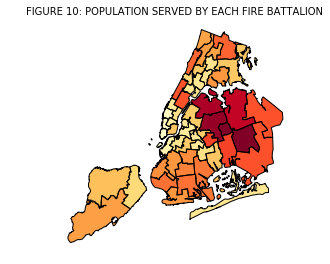

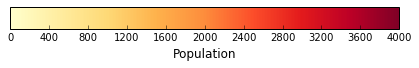

In [35]:
#Plotting heatmap of fire battalion population
fig1 = pl.figure(figsize=(15, 15))
fig1 = finalcombination.plot(column='HD01_VD01', alpha=1, colormap='YlOrRd')
fig1.axis('off')
pl.title("FIGURE 10: POPULATION SERVED BY EACH FIRE BATTALION", fontsize=10)

fig2 = pl.figure(figsize=(6, 2))
ax1 = fig2.add_axes([0.05, 0.80, 0.9, 0.15])
cmap = mpl.cm.YlOrRd
norm = mpl.colors.Normalize(vmin=0, vmax=4000)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='horizontal')
cb1.set_label('Population', fontsize = 12)

In [20]:
finalcombination['Population'] = finalcombination['HD01_VD01']
Battalion_Table = finalcombination[['FireBN', 'Population']]

In [21]:
BT = Battalion_Table.sort(columns= 'Population', axis=0, ascending=False, 
                           inplace=False, kind='quicksort', na_position='last')



/Users/daraperl/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app


<bound method DataFrame.head of     FireBN  Population
42      50      349149
46      46      334517
9       49      322667
27      52      306800
39      51      249060
14      53      238755
29      54      238691
11      11      237366
28      10      236867
31      15      228292
40      13      225440
21      33      218860
44      42      218542
8       58      215292
17      41      210515
5       38      204281
43      40      201913
30      43      194077
12       3      192715
35      48      192633
37      19      188451
33      23      185677
22      27      182156
48      22      154059
24       4      149671
38      39      148773
32      20      146783
36      17      145465
45      45      142920
16      57      142702
47      21      128974
41      16      127240
1       44      118190
0        8      114288
6       18      111280
15      31      110055
7       26      108629
26      47      108206
2       14      107724
25      12      107636
4       37      101901
18

In [23]:
BT.tail()

,FireBN,Population
19,6,95573
20,32,84431
10,7,67718
3,2,67310
23,1,58374
